# 1. Introduction
## 1.1 - Business problem

Last month Toshio, a japanese friend of mine who lives in Tokyo, asked me: "is Torino the right city for starting my japanese restaurant chain in Italy?"

Now, that I have the skills and the tools to use location data to explore a geographical location, I can answer the question.

For the uninitiated, Torino is the capital of Piedmont, in the northwest Italy, and was the first capital of the Kingdom of Italy from 1861 to 1865. Ranked third in Italy, after Milan and Rome, for economic strength, Torino is the world's 78th richest city by purchasing power, with a GDP of $58 billion. The city has a rich culture and history, being known for its numerous art galleries, restaurants, churches, palaces, opera houses, piazzas, parks, gardens, theatres, libraries, museums and other venues. Turin is well known for its Renaissance, Baroque, Rococo, Neo-classical, and Art Nouveau architecture. Turin's attractions make it one of the world's top 250 tourist destinations. 

The population of the city is estimate about 875,698 and I am a resident of this amazing city.

## 1.2 Target audience

This analysis could be useful for all business entrepreneurs who wants start a new business in Torino. They will prefer, I guess, the districts where there is a lower real estate cost and the type of business is less intense. 


# 2 - Data 

The city is split up into 8 boroughs, called "circoscrizioni", and 34 neighborhood, as you can see on this map:

https://github.com/pie88tro/Coursera_Capstone/blob/master/neighborhood-borough.png

The list of neighborhoods with the correspondent borough could be find in this PDF:

http://www.comune.torino.it/statistica/osservatorio/annuario/2018/pdf/CAP%202%20Toponomastica%20ed%20Edilizia%202018.pdf

Unfortunately, a dataset for Torino with boroughs-neighborhoods correlation, latitude, longitude and average land prices doesn't exist so I set-up my own data table and uploaded it on my github repository: 

https://raw.githubusercontent.com/pie88tro/Coursera_Capstone/master/Torino_Neighborhoods.csv

I used Google Map, ‘Search Nearby’ option to get the center coordinates of the each Borough ("Latitude" and "Longitude" columns).

The column "AVG price (€/m²)" is the average land price for every neighborhood and I've taken it from those two websites:

https://www.immobiliare.it/mercato-immobiliare/piemonte/torino/

https://www.mercato-immobiliare.info/piemonte/torino/torino.html

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/pie88tro/Coursera_Capstone/master/Torino_Neighborhoods.csv")
df

,Borough,Neighborhood,Latitude,Longitude,AVG Price (€/m²)
0,1,Centro,45.071767,7.678488,3263.5
1,1,Crocetta,45.058193,7.665198,2541.0
2,2,Santa Rita,45.046291,7.643089,1739.5
3,2,Mirafiori Nord,45.042951,7.629056,1689.5
4,2,Mirafiori Sud,45.021725,7.619190,1295.5
5,3,Borgo San Paolo,45.060186,7.642546,1891.0
6,3,Cenisia,45.069506,7.649560,1941.0
7,3,Pozzo Strada,45.068565,7.623186,1708.0
8,3,Cit Turin,45.074472,7.658915,2106.0
9,3,Borgata Lesna,45.055226,7.620605,3050.0


![](https://github.com/pie88tro/Coursera_Capstone/blob/master/neighborhood-borough.png)

# 3. Methodology

## 3.1. Business Understanding

The aim of my project is to find the best neighborhoods in Torino for opening a restaurant chain.

## 3.2. Analytical Approach


For my analisys, for extracting the venues of each neighborhood, I will use the Foursquare API:

https://developer.foursquare.com/docs/places-api/

After Data Exploration, I will use a K-Means algorithm to extract the clusters, produce a map and make an argument on the final result.

The total number of neighborhoods in Torino are 34 so I need to find a way to cluster them based on their similarities (number and kind of restaurant).

## 3.3 Data Exploration

In [ ]:
#!pip install beautifulsoup4
#!pip install lxml
!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c conda-forge geopy --yes 

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup
from IPython.display import display_html

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

### Define Foursquare Credentials and Version (hidden cell)¶

In [ ]:
# The code was removed by Watson Studio for sharing.

### Define function to repeat the same process to all the neighborhoods in Torino

In [ ]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
venues = getNearbyVenues(names=t_df['Neighborhood'],
                                   latitudes=t_df['Latitude'],
                                   longitudes=t_df['Longitude']
                          )

In [ ]:
#check the size of the resulting dataframe
print(venues.shape)
venues.head()

In [12]:
#how many venues were returned for each neighborhood
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aurora,67,67,67,67,67,67
Barca,4,4,4,4,4,4
Barriera di Milano,14,14,14,14,14,14
Bertolla,4,4,4,4,4,4
Borgata Lesna,5,5,5,5,5,5
Borgata Vittoria,4,4,4,4,4,4
Borgo Po,5,5,5,5,5,5
Borgo San Paolo,14,14,14,14,14,14
Campidoglio,10,10,10,10,10,10


In [14]:
#how many unique categories can be curated from all the returned venues?
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 141 uniques categories.


### Analyze Each Neighborhood

In [16]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,Abruzzo Restaurant,Asian Restaurant,Auditorium,Auto Garage,Auto Workshop,Automotive Shop,Bakery,Bar,Beer Bar,...,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#examine the new dataframe size
onehot.shape

(510, 142)

In [20]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each categor
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,Abruzzo Restaurant,Asian Restaurant,Auditorium,Auto Garage,Auto Workshop,Automotive Shop,Bakery,Bar,Beer Bar,...,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Aurora,0.00,0.014925,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.029851,0.014925,0.000000,0.000000,0.000000
1,Barca,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Barriera di Milano,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bertolla,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Borgata Lesna,0.00,0.000000,0.000000,0.000000,0.000000,0.2,0.200000,0.200000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Borgata Vittoria,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Borgo Po,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.2,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Borgo San Paolo,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000
8,Campidoglio,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
9,Cavoretto,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
#confirm the new size
grouped.shape

(33, 142)

In [68]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aurora              ----
                    venue  freq
0      Italian Restaurant  0.09
1                    Café  0.09
2            Cocktail Bar  0.09
3             Pizza Place  0.07
4  Piedmontese Restaurant  0.06


----Barca----
                venue  freq
0  Italian Restaurant  0.25
1         Pizza Place  0.25
2        Soccer Field  0.25
3                Café  0.25
4  Abruzzo Restaurant  0.00


----Barriera di Milano  ----
              venue  freq
0       Pizza Place  0.14
1          Dive Bar  0.07
2  Toy / Game Store  0.07
3          Bus Stop  0.07
4  Community Center  0.07


----Bertolla----
                  venue  freq
0           Pizza Place  0.25
1       Piercing Parlor  0.25
2            Restaurant  0.25
3  Gym / Fitness Center  0.25
4    Abruzzo Restaurant  0.00


----Borgata Lesna----
                 venue  freq
0  Sporting Goods Shop   0.2
1         Soccer Field   0.2
2      Automotive Shop   0.2
3               Bakery   0.2
4                  Bar   0.2


----Borga

In [69]:
#Put that into a pandas dataframe:
#1)write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#2)create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aurora,Italian Restaurant,Cocktail Bar,Café,Pizza Place,Piedmontese Restaurant,Historic Site,Plaza,Vegetarian / Vegan Restaurant,Restaurant,Tapas Restaurant
1,Barca,Pizza Place,Italian Restaurant,Café,Soccer Field,Fish Market,French Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market
2,Barriera di Milano,Pizza Place,Hostel,Pet Store,IT Services,Jewelry Store,Dive Bar,Toy / Game Store,Cultural Center,Café,Bus Stop
3,Bertolla,Piercing Parlor,Restaurant,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Dessert Shop,Eastern European Restaurant,Electronics Store,Emilia Restaurant
4,Borgata Lesna,Soccer Field,Sporting Goods Shop,Automotive Shop,Bakery,Bar,Fish Market,Fried Chicken Joint,French Restaurant,Food Stand,Food Court


### Cluster Neighborhoods

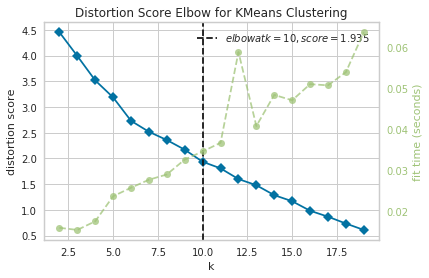

In [111]:
#!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

grouped_clustering = grouped.drop('Neighborhood', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(grouped_clustering)
visualizer.poof()

I used KElbowVisualizer to find the best k-number of clurster.

In [114]:
# set number of clusters
kclusters = 10

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 8, 1, 0, 6, 0, 1, 5], dtype=int32)

In [115]:
#neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = df

# merge torino_grouped with torino_data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Centro,45.071767,7.678488,3263.5,1.0,Italian Restaurant,Ice Cream Shop,Piedmontese Restaurant,Bistro,Hotel,Japanese Restaurant,Plaza,Pizza Place,Seafood Restaurant,Café
1,1,Crocetta,45.058193,7.665198,2541.0,1.0,Café,Pizza Place,Ice Cream Shop,Women's Store,Sushi Restaurant,Coffee Shop,Pub,Restaurant,Monument / Landmark,Market
2,2,Santa Rita,45.046291,7.643089,1739.5,1.0,Pizza Place,Ice Cream Shop,Dessert Shop,Café,Supermarket,Brewery,Market,Fried Chicken Joint,Movie Theater,Fast Food Restaurant
3,2,Mirafiori Nord,45.042951,7.629056,1689.5,0.0,Pizza Place,Health Food Store,Event Space,Seafood Restaurant,Supermarket,Gym,Ice Cream Shop,Italian Restaurant,History Museum,Hostel
4,2,Mirafiori Sud,45.021725,7.619190,1295.5,1.0,Garden,Hotel,Bus Station,Café,Women's Store,Fish Market,Food Stand,Food Court,Food & Drink Shop,Flea Market


In [116]:
#drop rows with NaN values
merged.dropna(axis=0, inplace=True)
# reset index after drop rows
merged.reset_index(drop=True, inplace=True)
#convert to int Cluster Labels column
merged['Cluster Labels'] = merged['Cluster Labels'].astype(int)

In [1]:
# create map
map_clusters = folium.Map(location=[45.071767, 7.678488], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'folium' is not defined

# 4. Result and Discussion

### Cluster 1

In [136]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Mirafiori Nord,1689.5,0,Pizza Place,Health Food Store,Event Space,Seafood Restaurant,Supermarket,Gym,Ice Cream Shop,Italian Restaurant,History Museum,Hostel
5,Borgo San Paolo,1891.0,0,Pizza Place,Italian Restaurant,Bakery,Park,Café,Supermarket,Kids Store,Diner,Hobby Shop,Vegetarian / Vegan Restaurant
15,Borgata Vittoria,1146.0,0,Pizza Place,Gym,Italian Restaurant,Cupcake Shop,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant
16,Lucento,1193.0,0,Italian Restaurant,Plaza,Soccer Stadium,Pizza Place,Diner,Dive Bar,Eastern European Restaurant,Electronics Store,Emilia Restaurant,Dessert Shop
19,Regio Parco,1728.5,0,Garden,Grocery Store,Supermarket,Furniture / Home Store,Italian Restaurant,Dive Bar,Eastern European Restaurant,Electronics Store,Emilia Restaurant,Event Space
20,Barca,1240.0,0,Pizza Place,Italian Restaurant,Café,Soccer Field,Fish Market,French Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market


### Cluster 2

In [120]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,3263.5,1,Italian Restaurant,Ice Cream Shop,Piedmontese Restaurant,Bistro,Hotel,Japanese Restaurant,Plaza,Pizza Place,Seafood Restaurant,Café
1,Crocetta,2541.0,1,Café,Pizza Place,Ice Cream Shop,Women's Store,Sushi Restaurant,Coffee Shop,Pub,Restaurant,Monument / Landmark,Market
2,Santa Rita,1739.5,1,Pizza Place,Ice Cream Shop,Dessert Shop,Café,Supermarket,Brewery,Market,Fried Chicken Joint,Movie Theater,Fast Food Restaurant
4,Mirafiori Sud,1295.5,1,Garden,Hotel,Bus Station,Café,Women's Store,Fish Market,Food Stand,Food Court,Food & Drink Shop,Flea Market
6,Cenisia,1941.0,1,Ice Cream Shop,Pizza Place,Sushi Restaurant,Piedmontese Restaurant,Movie Theater,Food & Drink Shop,Coffee Shop,Cocktail Bar,Chinese Restaurant,Café
8,Cit Turin,2106.0,1,Café,Plaza,Pizza Place,Italian Restaurant,Piedmontese Restaurant,Chinese Restaurant,Market,Furniture / Home Store,Food Stand,Movie Theater
9,Borgata Lesna,3050.0,1,Soccer Field,Sporting Goods Shop,Automotive Shop,Bakery,Bar,Fish Market,Fried Chicken Joint,French Restaurant,Food Stand,Food Court
10,San Donato,1906.0,1,Pizza Place,Hotel,Café,Gift Shop,Eastern European Restaurant,Roman Restaurant,Food Court,Bus Stop,Sicilian Restaurant,Gastropub
11,Parella,1683.0,1,Ice Cream Shop,Supermarket,Theater,Furniture / Home Store,Bookstore,Miscellaneous Shop,Gym / Fitness Center,Tram Station,Auto Garage,Hotel
12,Campidoglio,1881.0,1,Irish Pub,Supermarket,Japanese Restaurant,Jewelry Store,Park,Hotel,Rock Club,Café,Pizza Place,Wine Bar


### Cluster 3

In [121]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Vallette,1143.0,2,Lounge,Women's Store,Garden,Fried Chicken Joint,French Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fish Market


### Cluster 4

In [135]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Villaretto,1050.0,3,Rest Area,Restaurant,Women's Store,Farmers Market,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant


### Cluster 5

In [123]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Madonna di Campagna,1118.0,4,Abruzzo Restaurant,Bus Station,Train Station,Chinese Restaurant,Fish Market,French Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market


### Cluster 6

In [124]:
merged.loc[merged['Cluster Labels'] == 5, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Pozzo Strada,1708.0,5,Gym,Pool,Italian Restaurant,Trattoria/Osteria,Café,Women's Store,Food Stand,Food Court,Food & Drink Shop,Flea Market
31,Cavoretto,2589.0,5,Italian Restaurant,Park,Bus Station,Café,Women's Store,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fish Market


### Cluster 7

In [125]:
merged.loc[merged['Cluster Labels'] == 6, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Borgo Po,2900.0,6,Plaza,Italian Restaurant,Mini Golf,Restaurant,Beer Bar,Fast Food Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market


### Cluster 8

In [126]:
merged.loc[merged['Cluster Labels'] == 7, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Falchera,1140.0,7,Bus Station,Bus Stop,Women's Store,Dessert Shop,French Restaurant,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fish Market


### Cluster 9

In [127]:
merged.loc[merged['Cluster Labels'] == 8, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Bertolla,1315.0,8,Piercing Parlor,Restaurant,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Dessert Shop,Eastern European Restaurant,Electronics Store,Emilia Restaurant


### Cluster 10

In [128]:
merged.loc[merged['Cluster Labels'] == 9, merged.columns[[1] + list(range(4,merged.shape[1]))]]

,Neighborhood,AVG Price (€/m²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Rebaudengo,1045.0,9,Café,Plaza,Motorcycle Shop,Supermarket,Fish Market,Food Stand,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant


# 5. Conclusion

1. The most common venues in Torino are (obviously!) Pizza Place and Italian Restaurant.

2. Japanese and Sushi Restaurants are not very common in Torino, so that could be a great business for Toshio. They are frequent only in Cluster 2 (Cenisia, Campidoglio,Lingotto, Filadelfia, Crocetta and Centro Neighborhoods). Crocetta is an elegant residential neighborhood, Centro is the center of the city (the most expensive neighborhood in Torino) and Campidoglio is a multicultural neighborhood (perfect for walking, with a lot of artworks and murales). Lingotto and Filadelfia are bordering (in this area there were the FIAT factories now re-evaluated)

3. After my analysis, I suggest to my friend starting his business at Borgo Po, an expensive but strategic neighborhood. It is near the center but less explensive and less mess (here customers can find parking easily), elegant, with a lot of history and tourist places and, last but not least, it's the neighborhood where I live :)

4. Later, he could expand his restaurant chain in Vanchiglia, Cit Turin and San Salvario neighborhoods, wich have a good quality/price ratio and strategic position for nightlife.

Cheers!

Pietro Contegiacomo